In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as sm
import statsmodels.api as ap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("T1_Process.csv")
df['SE Process grade'].replace(to_replace=["A","F"], value=["1","2"],inplace=True)

In [3]:
data = df.iloc[:, 0:-1]

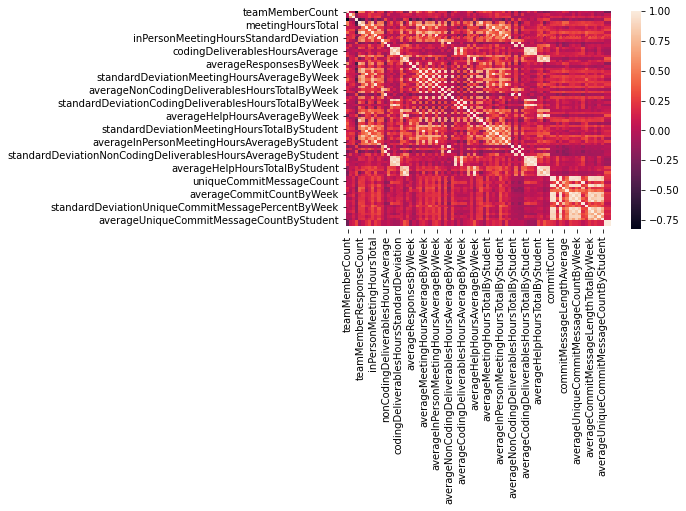

In [4]:
corr = data.corr()
figure = sns.heatmap(corr)

In [5]:
fig = figure.get_figure()
fig.savefig("before_process_t1.png", dpi=600, transparent=False, figsize=(20,12))

In [6]:
# sns_plot = sns.heatmap(corr, annot=True, annot_kws={'size': 3}, cmap='YlGnBu')

## Compare the correlation between features and remove one of two features that have a correlation higher than 0.9.

In [7]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

##  Selecting the columns based on how they affect the p-value.
## Removing the column diagnosis because it is the column we are trying to predict.

In [8]:
selected_columns = selected_columns[1:].values
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = ap.OLS(Y,x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [9]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [10]:
result = pd.DataFrame()
result['diagnosis'] = df.iloc[:, 84].values

In [11]:
result.head()

,diagnosis
0,2
1,1
2,2
3,1
4,1


In [12]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [13]:
data

,teamDistribution,teamMemberResponseCount,meetingHoursTotal,meetingHoursAverage,inPersonMeetingHoursAverage,nonCodingDeliverablesHoursTotal,nonCodingDeliverablesHoursAverage,nonCodingDeliverablesHoursStandardDeviation,codingDeliverablesHoursTotal,codingDeliverablesHoursAverage,averageResponsesByWeek,averageMeetingHoursTotalByWeek,averageNonCodingDeliverablesHoursTotalByWeek,averageResponsesByStudent,averageMeetingHoursTotalByStudent,averageInPersonMeetingHoursTotalByStudent,lateIssueCount
0,1.0,1.0,2.000000,2.000000,2.000000,6.000000,6.000000,0.000000,0.000000,0.000000,1.0,2.000000,6.000000,1.0,2.000000,2.000000,0.0
1,1.0,3.0,9.714286,3.238095,2.095238,4.571429,1.523810,0.942809,1.714286,0.571429,3.0,9.714286,4.571429,1.0,3.238095,2.095238,0.0
2,1.0,3.0,4.000000,1.333333,1.142857,6.285715,2.095238,0.471405,1.714286,0.571429,3.0,4.000000,6.285715,1.0,1.333333,1.142857,0.0
3,0.0,1.0,2.000000,2.000000,1.000000,1.500000,1.500000,0.000000,0.000000,0.000000,1.0,2.000000,1.500000,1.0,2.000000,1.000000,0.0
4,0.0,3.0,11.000000,3.666667,1.666667,23.000000,7.666667,3.771236,9.000000,3.000000,3.0,11.000000,23.000000,1.0,3.666667,1.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,10.0,10.714286,1.071429,0.928571,12.428572,1.242857,2.491987,4.000000,0.400000,5.0,5.357143,6.214286,2.0,2.142857,1.857143,0.0
60,0.0,10.0,8.785714,0.878571,0.475000,6.642857,0.664286,0.867468,3.000000,0.300000,5.0,4.392857,3.321429,2.0,1.757143,0.950000,0.0
61,0.0,10.0,16.535714,1.653571,1.328571,10.714286,1.071429,0.707107,2.428571,0.242857,5.0,8.267857,5.357143,2.0,3.307143,2.657143,0.0
62,0.0,12.0,18.285714,1.523810,1.184524,20.357143,1.696429,1.345646,2.571429,0.214286,6.0,9.142857,10.178571,2.0,3.047619,2.369048,0.0


In [14]:
corr_1 = data.corr()

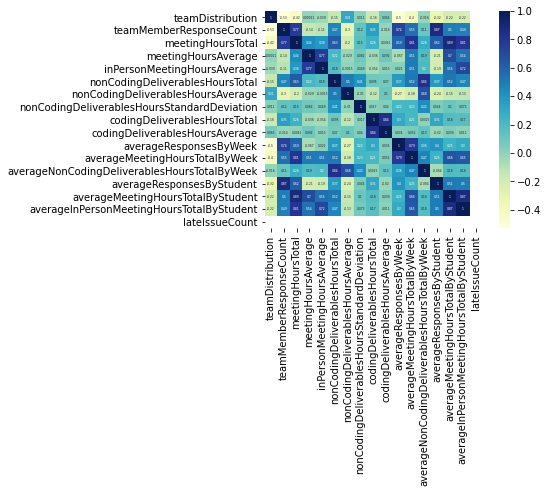

In [15]:
sns_plot = sns.heatmap(corr_1, annot=True, annot_kws={'size': 3}, square=True, 
                       cmap='YlGnBu', xticklabels=True, yticklabels=True)

In [16]:
fig = sns_plot.get_figure()
fig.savefig("T1_Process_Corelation.png", dpi=600, transparent=False, figsize=(20,12))

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.25)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
svc=SVC() 
svc.fit(x_train, y_train)

SVC()

In [18]:
prediction = svc.predict(x_test)

In [19]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

0.8125


In [20]:
print("Accuracy:",accuracy_score(y_test, prediction))
print("F1 Score: ",f1_score(y_test, prediction, average='macro'))
print("Recall score: ", recall_score(y_test,prediction, average='macro'))

Accuracy: 0.8125
F1 Score:  0.6444444444444445
Recall score:  0.6785714285714286
